<a href="https://colab.research.google.com/github/Vynogradova/homework/blob/main/Homework_10_%22%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yulu_rental.csv')

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [60]:
# Кількість рядків і стовпців (розмір даних)
rows, cols = df.shape
print(f"Набір даних містить {rows} рядків та {cols} колонок")

# Перегляд перших 5 рядків, щоб зрозуміти структуру
print(df.head())

# Період, за який є дані: мінімальна і максимальна дата
print('Початок даних:', df.index.min())
print('Кінець даних:', df.index.max())

# Перевіримо, чи інтервал між рядками однаковий (різниця між рядками)
print(df.index.to_series().diff().value_counts())

Набір даних містить 10886 рядків та 19 колонок
                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [61]:
# Групування поденно за сумарною кількістю оренд
daily_counts = df.groupby('date')['count'].sum()

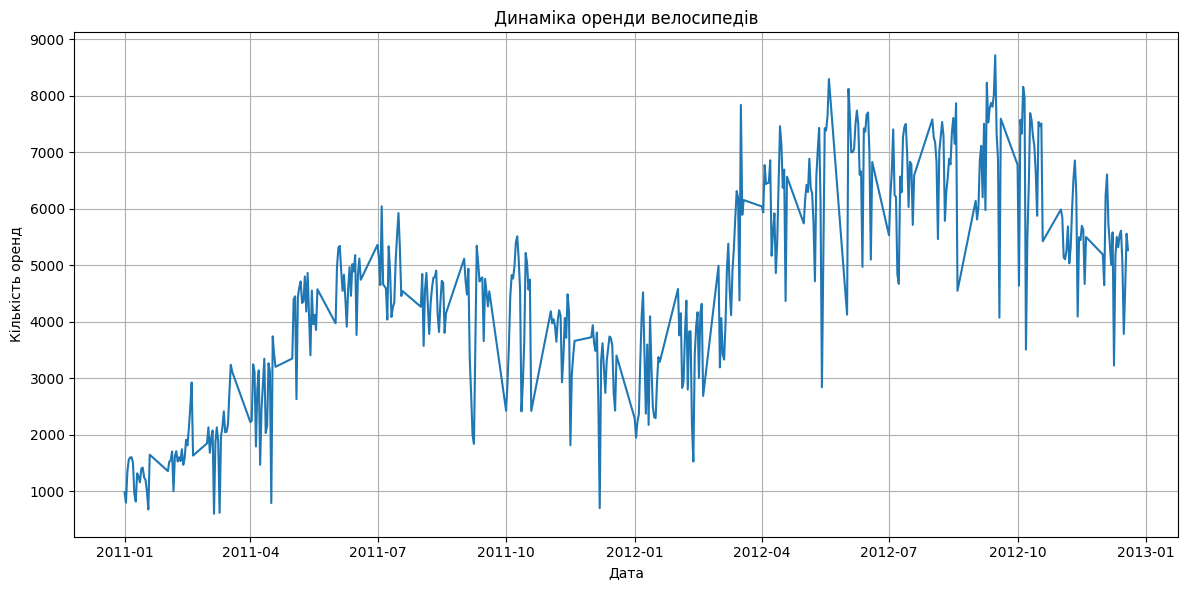

In [62]:
# Побудова графіка
plt.figure(figsize=(12, 6))
daily_counts.plot()

plt.title('Динаміка оренди велосипедів')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
#Максимальна кількість оренд в день:
max_day = daily_counts.idxmax()
max_value = daily_counts.max()
print(f"Найбільше оренд було {max_value} на дату {max_day}")

Найбільше оренд було 8714 на дату 2012-09-15


In [64]:
#Мінімальна кількість оренд в день:
min_day = daily_counts.idxmin()
min_value = daily_counts.min()
print(f"Найменше оренд було {min_value} на дату {min_day}")

Найменше оренд було 605 на дату 2011-03-06


In [65]:
#Середнє значення:
avg_daily = daily_counts.mean()
print(f"Середня кількість оренд на день: {avg_daily:.2f}")

Середня кількість оренд на день: 4573.41


#1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?

- Різний попит — будні/вихідні, робочі дні.

- Погодні умови — дощ, сніг або спека значно впливають на попит.

- Свята чи події — можуть або збільшити, або зменшити кількість оренд.

- Збої в системі.

#2. Які загальні тенденції ви бачите на графіку?
Загальний тренд зростання — з початку 2011 до середини 2012 року кількість оренд стабільно зростає.

Пік активності — восени 2012 року досягається максимум (8714 оренд).

Легка стабілізація або спад — в кінці 2012 видно зменшення оренд, можливо, через зміну сезону.
#3. Чи помітні якісь сезонні коливання?
Так, яскраво виражена сезонність

Весна – Літо (березень–вересень) - підвищення попиту (думаю, це пов'язано, що
більше людей пересуваються містом на велосипеді).

Осінь – Зима (жовтень–лютий) - різке падіння кількості оренд (погодні умови, короткий день, холод).
#4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
Аномально високі значення:
2012-09-15 — 8714 оренд (+ це вихідний день)

Значно перевищує середнє (4573 оренди/день).

Аномально низькі значення:
2011-03-06 — 605 оренд.

- Ранній етап запуску.

- Зима або рання весна.

- Можливий технічний збій.

<Axes: title={'center': 'Тижнева динаміка оренди велосипедів'}, xlabel='date'>

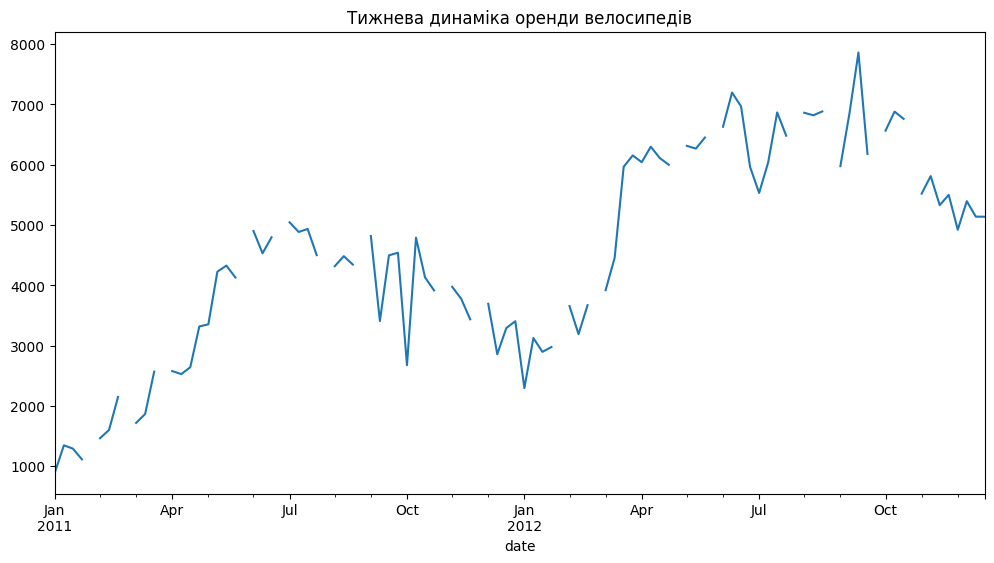

In [66]:
#Агрегування по тижнях або місяцях, щоб прибрати заломи :

# Приводимо індекс до DatetimeIndex
daily_counts.index = pd.to_datetime(daily_counts.index)

# Групувати по тижнях
weekly_counts = daily_counts.resample('W').mean()

# Побудова графіка
weekly_counts.plot(figsize=(12, 6), title="Тижнева динаміка оренди велосипедів")


In [67]:
# Перевірка дня, коли було найбільше оренди
import pandas as pd

date = pd.to_datetime('2012-09-15')
print(date.day_name())

Saturday



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [68]:
# Перевірка структури DataFrame
print(df.head())
print(df.index)

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2011-01-01 04:00:00        75        0.0       0

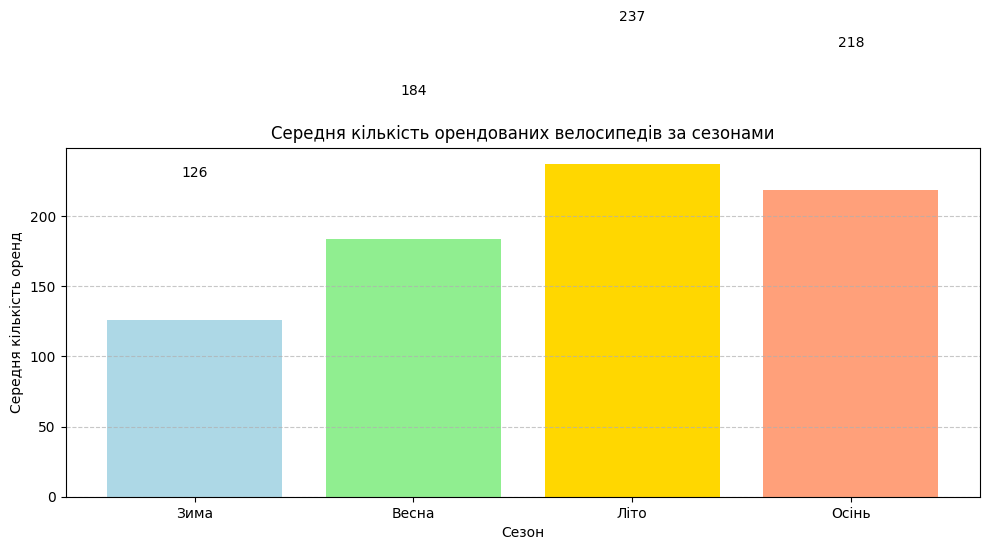

In [69]:
# datetime — перетворюємо на індекс
df.index = pd.to_datetime(df.index)

# Колонка "Сезон" з індексу
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Літо'
    else:
        return 'Осінь'

df['Сезон'] = df.index.month.map(get_season)

# Групуємо по сезонах + рахуємо середнє
seasonal_avg = df.groupby('Сезон')['count'].mean()
seasonal_avg = seasonal_avg.loc[['Зима', 'Весна', 'Літо', 'Осінь']]

# Побудова графіка
plt.figure(figsize=(10,6))
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color=['#ADD8E6', '#90EE90', '#FFD700', '#FFA07A'])

# Підписи над стовпцями
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval:.0f}', ha='center', va='bottom')


plt.title('Середня кількість орендованих велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Питання для інтерпретації:

#В який сезон найбільша середня кількість оренди велосипедів?
Літо — найвища середня кількість оренд (≈ 250 оренд/день, згідно з графіком).

# Як ви можете пояснити таку сезонну закономірність?
Влітку: тепла та суха погода — ідеальні умови для велопрогулянок, канікули та відпустки, події, туризм, активності на відкритому повітрі.

Взимку: низька температура, сніг, ожеледь — погані умови для їзди на велосипеді.

#У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?
Літо ≈ 250

Зима ≈ 125

Отже, влітку оренда приблизно в 2 рази більша, ніж узимку.



## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [70]:
print(df.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour', 'Сезон'],
      dtype='object')


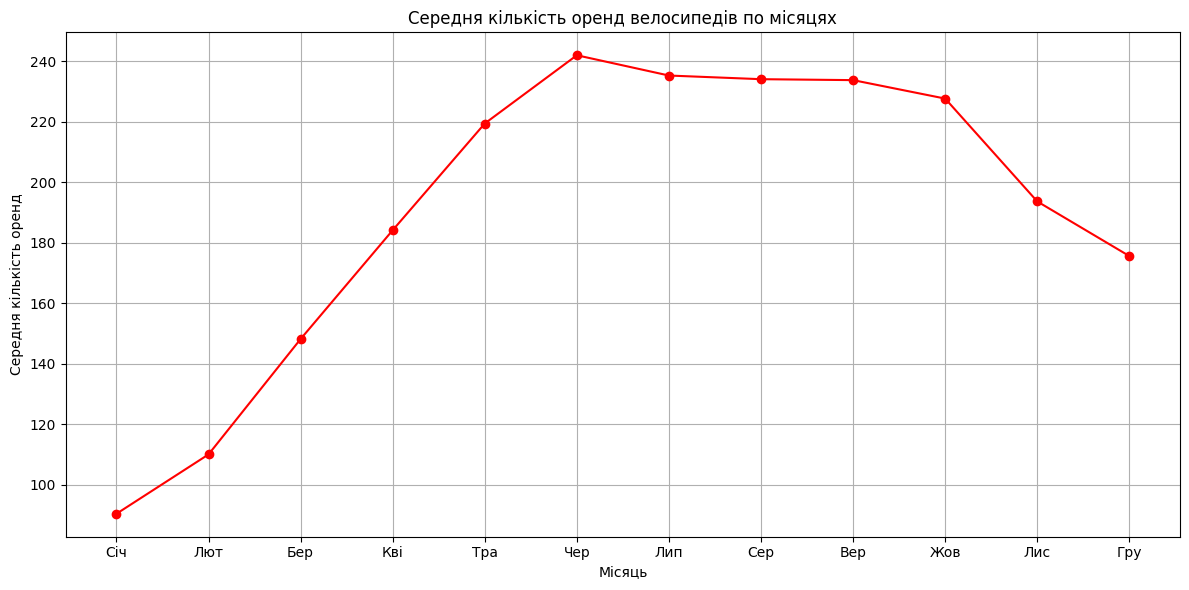

In [71]:
df['date'] = pd.to_datetime(df['date'])

# Групуємо по місяцях + середню кількість оренд
monthly_avg = df.groupby('month')['count'].mean()

# Побудова графіку
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')

# Підписи по осі X — 12 чітких поділок (місяці)
plt.xticks(ticks=range(1, 13), labels=[
    'Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер',
    'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру'
])

plt.grid(True)
plt.title('Середня кількість оренд велосипедів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.tight_layout()
plt.show()

#В які місяці спостерігається пік та спад оренди?
Пік оренди:

Червень, Липень, Серпень — найвищі значення.

Це літо — період відпусток, довгий світловий день, тепла погода.

Спад оренди:

Січень, Лютий — найнижча кількість оренд.

Це зима — холодно, сніг, слизько, короткий день.
#Чи збігається ця закономірність з результатами з попереднього завдання?
Так, повністю збігається.

В попередньому завданні літо також було найпопулярнішим сезоном, а зима — найменш активним.
#Як може вплинути клімат на оренду велосипедів протягом року?
Температура:

- Cприяє активному використанню велосипедів.

- Надто холодно або спекотно — кількість оренд знижується.

Опади:

- Дощ, сніг, ожеледь значно знижують попит на оренду — незручно і небезпечно.

Світловий день:

- Влітку — довший день - більше часу для катання.

- Взимку — темніє рано - менше активності.

Інші фактори:

Якість велоінфраструктури, святкові дні, туристичний сезон.


## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

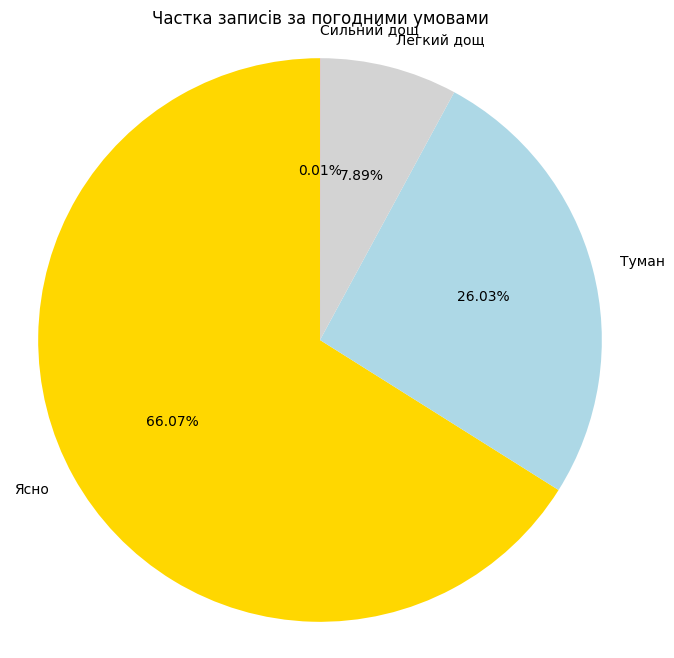

In [78]:
# Створення словника для описів погоди
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

# Колонка з текстовим описом погоди
df['weather_desc'] = df['weather'].map(weather_map)
import matplotlib.pyplot as plt

# Підрахунок кількості записів для кожного типу погоди
weather_counts = df['weather_desc'].value_counts()
weather_percent = weather_counts / weather_counts.sum() * 100

# Кольори на вибір
colors = ['gold', 'lightblue', 'lightgrey', 'lightcoral']

# Побудова діаграми
plt.figure(figsize=(8, 8))
plt.pie(weather_counts,
        labels=weather_counts.index,
        autopct='%1.2f%%',
        colors=colors,
        startangle=90)

plt.title('Частка записів за погодними умовами')
plt.axis('equal')  # щоб коло було круглим
plt.show()

#Яка погода переважає в датасеті?
Переважає ясна погода — 66.07% усіх записів.
Це свідчить про те, що більшість днів у датасеті мали сприятливі погодні умови.

#Чи є дні із сильним дощем? Яка їх частка?
Так, дні із сильним дощем присутні, але їх надзвичайно мало — лише 0.01%.
Це може бути буквально 1–2 записи, що є викидом або дуже рідкісним явищем.

#Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
Чим гірші погодні умови — тим менше оренд.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [75]:
import seaborn as sns

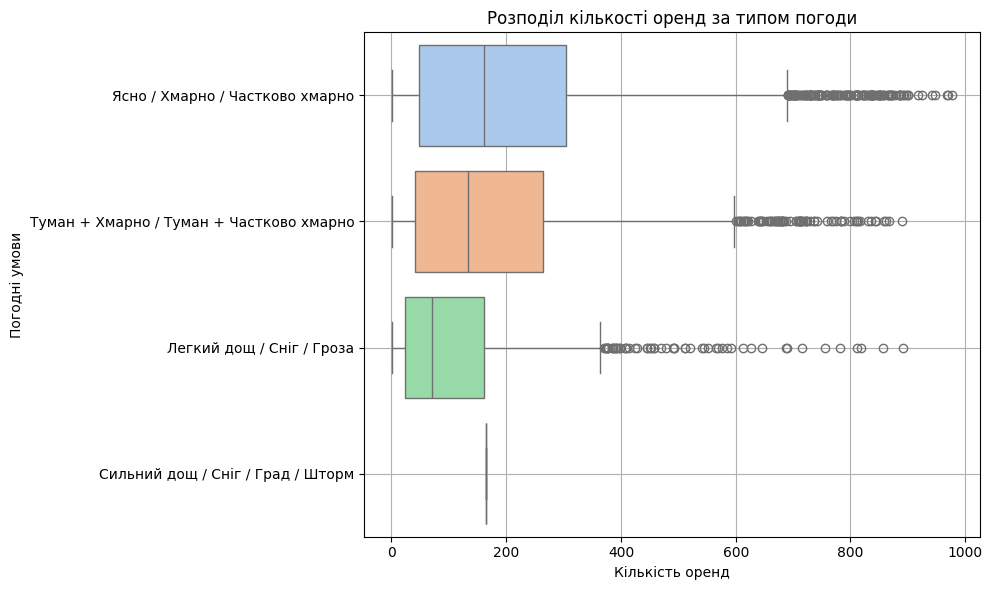

In [83]:
# Створимо словник відповідностей weather - опис
weather_labels = {
    1: 'Ясно / Хмарно / Частково хмарно',
    2: 'Туман + Хмарно / Туман + Частково хмарно',
    3: 'Легкий дощ / Сніг / Гроза',
    4: 'Сильний дощ / Сніг / Град / Шторм'
}

# Додаємо нову колонку з описом погоди
df['weather_desc'] = df['weather'].map(weather_labels)

# Побудова boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='weather_desc', x='count', hue='weather_desc', palette='pastel', legend=False)

plt.title('Розподіл кількості оренд за типом погоди')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.grid(True)
plt.tight_layout()
plt.show()

#При якій погоді найбільший розкид у кількості оренди?
Ясно / Хмарно / Частково хмарно — мають найбільший розкид (широка "коробка" і багато викидів праворуч).
#Чи є викиди (outliers) в даних? При якій погоді?
Так, викиди є — їх видно як окремі точки за межами вусів (усиків):

Найбільше викидів спостерігається у групі "Ясно / Хмарно / Частково хмарно" — праворуч від коробки.

Також є викиди у групах з туманом і легким дощем, але їх менше.

Для сильного дощу майже немає викидів — можливо, через дуже малу кількість записів.
#При якій погоді медіанне значення оренди найвище?
Найвища медіана (середня горизонтальна риска в коробці) — у категорії "Ясно / Хмарно / Частково хмарно".
Це означає, що в хорошу погоду оренд більше, навіть у звичайні дні.



Очікуваний результат:

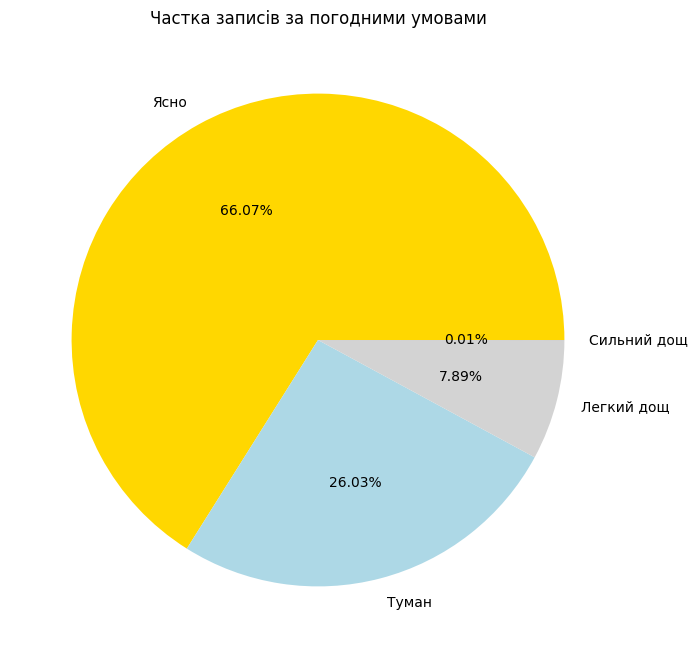

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

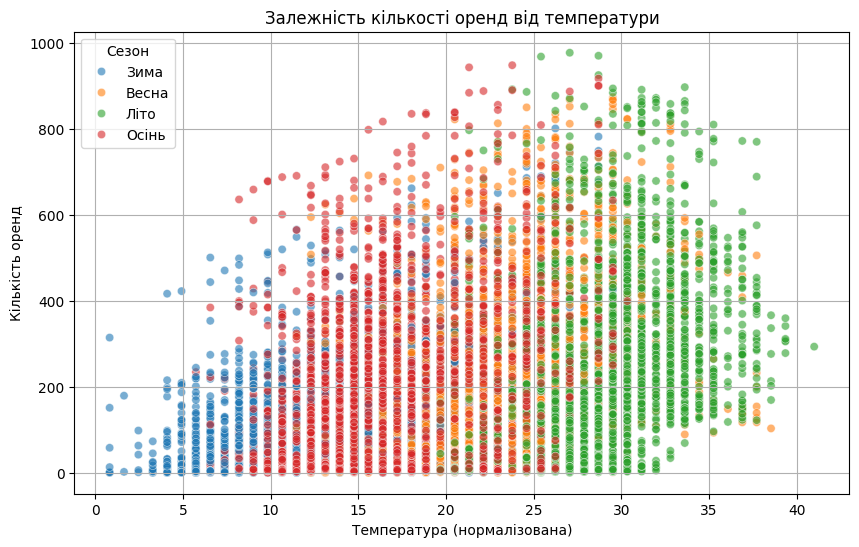

In [80]:
# Створимо нову колонку з назвами сезонів для кольору
season_map = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
df['Сезон'] = df['season'].map(season_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='count', hue='Сезон', alpha=0.6)

plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура (нормалізована)')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон')
plt.grid(True)
plt.show()

#Чи є зв'язок між температурою та кількістю оренди? Який?
Так, зв'язок між температурою та кількістю оренд є.

- Позитивна кореляція :

Із зростанням температури кількість оренд збільшується.

Найбільше оренд — у діапазоні від 0.4 до 0.8 нормалізованої температури (це приблизно +10°C до +25°C).

- Спад на дуже високих температурах:

При температурі вище 0.8 (тобто >~30°C), кількість оренд трохи спадає — імовірно, через надто спекотну погоду.

- Низькі температури (до 0.2) — оренд дуже мало, що логічно для зимових місяців.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

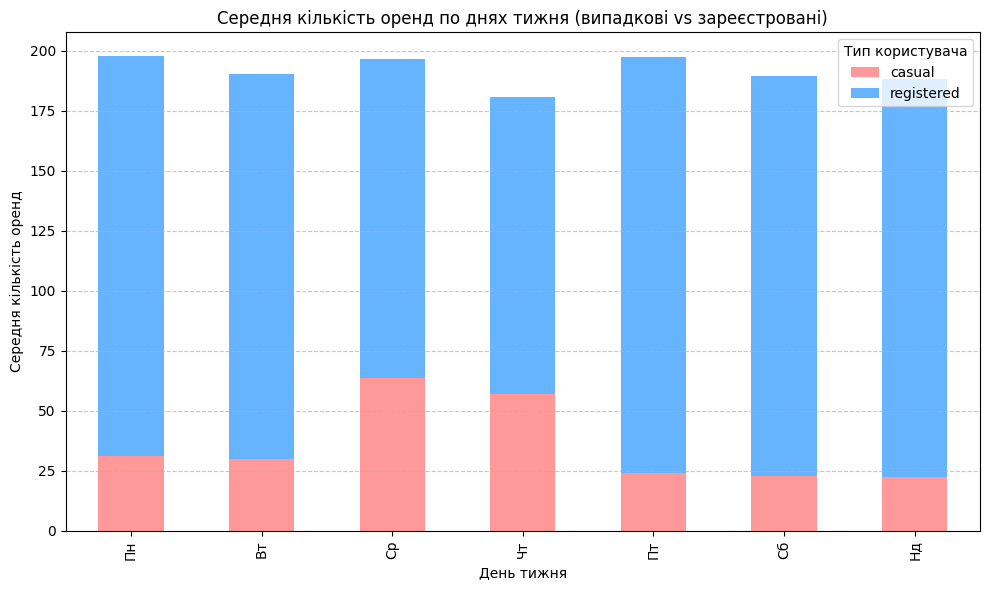

In [81]:
# Групуємо дані по днях тижня та обчислюємо середнє
avg_by_day = df.groupby('weekday')[['casual', 'registered']].mean()

# Переіменування днів тижня (0 — понеділок, 6 — неділя)
days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']
avg_by_day.index = days

# Побудова stacked bar chart
avg_by_day.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

plt.title('Середня кількість оренд по днях тижня (випадкові vs зареєстровані)')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.legend(title='Тип користувача')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#В які дні тижня більше оренд від зареєстрованих користувачів?
Згідно з графіком:

У будні дні (Пн–Пт) кількість оренд зареєстрованими користувачами (registered) значно переважає.

У вихідні (Сб–Нд) частка випадкових користувачів (casual) зростає, особливо в суботу й неділю.
#Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
Зареєстровані (registered):
- Частіше беруть велосипеди в будні.

Ймовірно, вони — постійні мешканці міста, які використовують велосипед для поїздок на роботу/навчання.

Випадкові (casual):
- Активніші у вихідні.

Це можуть бути туристи або місцеві, які орендують велосипеди для відпочинку, прогулянок або розваг.
